<a href="https://colab.research.google.com/github/VeronicaIovchik/HW3--NLP/blob/main/ex3_nlp_updated_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dropout, Conv1D, Flatten, Dense, Embedding
from keras.preprocessing import sequence
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from tensorflow.keras.utils import pad_sequences
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import random 
import random as python_random
np.random.seed(10)
tf.random.set_seed(10)
python_random.seed(10)

#Read The Files:

In [ ]:
url_train = "https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20III/train.csv"
train = pd.read_csv(url_train,error_bad_lines=False)
train


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Dialogue,Character,Episode,Show,Dialogue_length
0,Hey.,joey,Season-07 Episode-13-The One Where Rosita Dies,Friends,1
1,(to Joey) Are you gonna be embarrassed going ...,phoebe,Season-10 Episode-04-The One With The Cake,Friends,13
2,"Me? No no no, you. You're gonna tell him. I'm ...",elaine,S03E22,Seinfeld,14
3,Alright you guys are off to party number one ...,chandler,Season-02 Episode-22-The One With the Two Parties,Friends,56
4,Am I? Or am I so sane that you just blew your ...,kramer,S05E12,Seinfeld,13
...,...,...,...,...,...
70400,Pretty much.,jerry,S05E09,Seinfeld,2
70401,"Oh, well um, not right now. Y'know I’m just g...",phoebe,Season-03 Episode-05-The One With Frank Jr.,Friends,22
70402,"Ooh, I think I wanna trade circles.",phoebe,Season-07 Episode-22-The One With Chandler’s Dad,Friends,7
70403,"Hey, hey, what is this? What's going on here?",jerry,S05E03,Seinfeld,9


In [ ]:
url_test = 'https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20III/test.csv'
test = pd.read_csv(url_test,error_bad_lines=False)
test.head(5)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Dialogue,Character,Episode,Show,Dialogue_length
0,"Oh my God, that's great! I'm smart!! No, no, ...",joey,Season-10 Episode-05-The One Where Rachel's Si...,Friends,30
1,"Listen, I’m sure that dad doesn’t care. He pr...",monica,Season-07 Episode-03-The One With Phoebe’s Coo...,Friends,20
2,Well I am. Couldn't you try to go through some...,george,S09E16,Seinfeld,18
3,Yes I am. We had a verbal contract. If we can'...,kramer,S07E13,Seinfeld,20
4,"Um, I straightened out your shower curtain so...",monica,Season-02 Episode-18-The One Where Dr. Remore ...,Friends,17


Labeling the data : 

In [ ]:
y_train = train['Show'] 
y_test = test ["Show"]

#Clean the data

In [ ]:
# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\:]', '', text)

# Removing the noisy text
def clean_text(text):
    text = remove_between_square_brackets(text)
    return text


# Apply function on review column
train['Dialogue'] = train['Dialogue'].apply(clean_text)
test['Dialogue'] = test['Dialogue'].apply(clean_text)

train['Dialogue']

0                                                     Hey.
1         (to Joey) Are you gonna be embarrassed going ...
2        Me? No no no, you. You're gonna tell him. I'm ...
3         Alright you guys are off to party number one ...
4        Am I? Or am I so sane that you just blew your ...
                               ...                        
70400                                         Pretty much.
70401     Oh, well um, not right now. Y'know I’m just g...
70402                  Ooh, I think I wanna trade circles.
70403        Hey, hey, what is this? What's going on here?
70404                                  I want the massage!
Name: Dialogue, Length: 70405, dtype: object

In [ ]:
# Define function for removing special characters
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

# Apply function on review column
train['Dialogue'] = train['Dialogue'].apply(remove_special_characters)
test['Dialogue'] = test['Dialogue'].apply(remove_special_characters)


train['Dialogue']

0                                                      Hey
1         to Joey Are you gonna be embarrassed going up...
2        Me No no no you Youre gonna tell him Im not go...
3         Alright you guys are off to party number one ...
4        Am I Or am I so sane that you just blew your mind
                               ...                        
70400                                          Pretty much
70401     Oh well um not right now Yknow Im just gonna ...
70402                    Ooh I think I wanna trade circles
70403             Hey hey what is this Whats going on here
70404                                   I want the massage
Name: Dialogue, Length: 70405, dtype: object

remove stop words 

In [ ]:
nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')
print('Number of English stop words:', len(stopword_list))
print(stopword_list[:10])

Number of English stop words: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Removing the stopwords
tqdm.pandas()

def remove_stopwords(text, is_lower_case=False):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

# Apply function on review column
train['Dialogue'] = train['Dialogue'].progress_apply(remove_stopwords)
test['Dialogue'] = test['Dialogue'].progress_apply(remove_stopwords)

  0%|          | 0/70405 [00:00<?, ?it/s]

  0%|          | 0/4245 [00:00<?, ?it/s]

In [ ]:
train['Dialogue']

0                                                      Hey
1            Joey gonna embarrassed going nothing prepared
2                       Youre gonna tell Im gonna tell Noo
3        Alright guys party number one ushers 3 guys Mo...
4                                           sane blew mind
                               ...                        
70400                                          Pretty much
70401    Oh well um right Yknow Im gonna go bed think f...
70402                        Ooh think wanna trade circles
70403                                  Hey hey Whats going
70404                                         want massage
Name: Dialogue, Length: 70405, dtype: object

In [ ]:
# Stemming the text
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    stemmed_words_list = []
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text
# Apply function on review column
train['Dialogue'] = train['Dialogue'].progress_apply(simple_stemmer)
test['Dialogue'] = test['Dialogue'].progress_apply(simple_stemmer)

train['Dialogue']

  0%|          | 0/70405 [00:00<?, ?it/s]

  0%|          | 0/4245 [00:00<?, ?it/s]

0                                                      hey
1                      joey gonna embarrass go noth prepar
2                        your gonna tell im gonna tell noo
3        alright guy parti number one usher 3 guy monic...
4                                           sane blew mind
                               ...                        
70400                                          pretti much
70401    oh well um right yknow im gonna go bed think f...
70402                          ooh think wanna trade circl
70403                                      hey hey what go
70404                                          want massag
Name: Dialogue, Length: 70405, dtype: object

#Split into train and validition

In [ ]:
x_train, x_validation, y_train, y_validation = train_test_split(train['Dialogue'], y_train, test_size=0.2, random_state=42)

In [ ]:
#define the test data 
x_test = test['Dialogue']

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
print('x_val shape:', x_validation.shape)
print('y_val shape:', y_validation.shape)

x_train shape: (56324,)
y_train shape: (56324,)
x_test shape: (4245,)
y_test shape: (4245,)
x_val shape: (14081,)
y_val shape: (14081,)


In [ ]:
cv = CountVectorizer(analyzer='word')

x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)
x_validation_cv = cv.transform(x_validation)

print('x_train_cv:', x_train_cv.shape)
print('x_test_cv:', x_test_cv.shape)
print('x_val_cv:', x_validation_cv.shape)

x_train_cv: (56324, 15758)
x_test_cv: (4245, 15758)
x_val_cv: (14081, 15758)


In [ ]:
print(x_train_cv[1])
print(x_train_cv[30])

  (0, 14337)	1
  (0, 7697)	1
  (0, 5512)	1
  (0, 15496)	1
  (0, 6260)	1


#Labeling

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
y_validation = lb.transform(y_validation)

In [ ]:
y_train [:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1]])

We can see that Friends and Seinfeld are now 1 and 0 respectively

# The Model

In [ ]:
token = Tokenizer(lower=False)
token.fit_on_texts(x_train)
token.fit_on_texts(test['Dialogue'])

In [ ]:
x_train.shape

(56324,)

In [ ]:
#convert to sequences
x_train_dl = token.texts_to_sequences(x_train)
x_val_dl = token.texts_to_sequences(x_validation)
x_test_dl = token.texts_to_sequences(x_test)

calculate the length

In [ ]:
doc_len_list = [len(doc) for doc in x_train_dl]

In [ ]:
max(doc_len_list), min(doc_len_list), np.mean(doc_len_list)

(185, 0, 5.830409772033236)

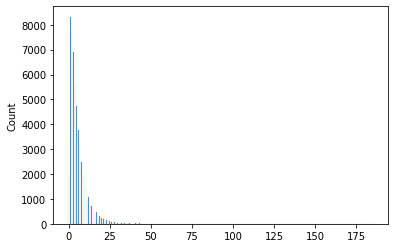

In [ ]:
sns.histplot(doc_len_list)

In [ ]:
max_words = 100

x_train_dl = pad_sequences(x_train_dl, maxlen=max_words)
x_val_dl = pad_sequences(x_val_dl, maxlen=max_words)
x_test_dl = pad_sequences(x_test_dl, maxlen=max_words)

In [ ]:
print(x_train_dl.shape)
x_train_dl[10, :]

(56324, 100)


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  289,
        290,  369,  101,  789,    3, 3758, 3759,  170,    3,   53,   16,
        369], dtype=int32)

In [ ]:
total_words = len(token.word_index) + 1 
total_words

17089

Let's build the architecture:

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=32, input_length=max_words))
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           546848    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0

In [ ]:
model.fit(x_train_dl, y_train, validation_data=(x_val_dl, y_validation), epochs=5, batch_size=64)

Epoch 1/5
881/881 [==============================] - 161s 179ms/step - loss: 0.5370 - accuracy: 0.6942 - val_loss: 0.4957 - val_accuracy: 0.7284
Epoch 2/5
881/881 [==============================] - 154s 175ms/step - loss: 0.4462 - accuracy: 0.7642 - val_loss: 0.4914 - val_accuracy: 0.7328
Epoch 3/5
881/881 [==============================] - 147s 167ms/step - loss: 0.4085 - accuracy: 0.7858 - val_loss: 0.4961 - val_accuracy: 0.7283
Epoch 4/5
881/881 [==============================] - 141s 160ms/step - loss: 0.3796 - accuracy: 0.7991 - val_loss: 0.5217 - val_accuracy: 0.7298
Epoch 5/5
881/881 [==============================] - 143s 163ms/step - loss: 0.3566 - accuracy: 0.8113 - val_loss: 0.5782 - val_accuracy: 0.7286


In [ ]:
model.evaluate(x_test_dl, y_test)

133/133 [==============================] - 3s 20ms/step - loss: 0.5132 - accuracy: 0.8285


[0.5132022500038147, 0.8285041451454163]

We can see the test accuracy is 82.85%

<h2>Model Evaluation</h2>
In this part we will evaluate the accuracy of the model on each character.<br>
We will take our pre prosessed test and split it by character with the indexes from the original test.



In [ ]:
#the names of the characthers in the test data
characters_name_arr = np.unique(test['Character'])
characters_name_arr

array(['chandler', 'elaine', 'george', 'jerry', 'joey', 'kramer',
       'monica', 'phoebe', 'rachel', 'ross'], dtype=object)

In [ ]:
len(test['Show']=="Friends")

4245

In [ ]:
y_test
#0 for friends, 1 for Seinfeld

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
# split the original test by characters in order to get the indexes of each characther to apply onthe proccesed test.
characters_dfs = [test.query("Character=='chandler'"),test.query("Character=='elaine'"),test.query("Character=='george'"),
  test.query("Character=='jerry'"),test.query("Character=='joey'"),test.query("Character=='kramer'"),test.query("Character=='monica'"),test.query("Character=='phoebe'")
  ,test.query("Character=='rachel'"),test.query("Character=='ross'")]

In [ ]:
characters_dfs[0]

,Dialogue,Character,Episode,Show,Dialogue_length
23,your arrang flower point dish tabl got dead fl...,chandler,Season-06 Episode-08-The One With Ross’s Teeth,Friends,30
27,oh think episod three compani there kind misun...,chandler,Season-01 Episode-02-The One With the Sonogram...,Friends,16
30,fine goe room slam door slam bottom half door,chandler,Season-03 Episode-05-The One With Frank Jr.,Friends,18
32,problem though concert matter great show girl ...,chandler,Season-01 Episode-02-The One With the Sonogram...,Friends,40
41,hi hi okay slight mixup jewelri store ring you...,chandler,Season-06 Episode-23-The One With The Ring,Friends,58
...,...,...,...,...,...
4188,uh dknow point gonna set someon id like think ...,chandler,Season-01 Episode-08-The One Where Nana Dies T...,Friends,28
4206,well got job interview kinda big deal lot mone...,chandler,Season-08 Episode-21-The One With The Cooking ...,Friends,26
4210,okay okayokay ah chloe work guy issac issac si...,chandler,Season-03 Episode-16-The One The Morning After,Friends,34
4223,hey see ross pack hotel toiletri soap shampoo ...,chandler,Season-08 Episode-02-The One With The Red Sweater,Friends,21


In [ ]:
#split the original test by characters in order to get the indexes of each character to apply on the processed test.
friends_names = ['chandler','rachel','phoebe','joey','monica','ross']


In [ ]:
#dictionery for accuracy 
acc_by_name = {}


**The get_acc_by_charcter_name function**<br>
Gets the test df by character, name of the character and the index of the characther in the name array.<br>

*  For Friends charachters we create y.test of zeros and for Seinfeld characters of ones.

*  For each character we will save the prediction, using the trained model.

*  We add into char_test_words_clean the original text parts of each character.
 



In [ ]:
def get_acc_by_character_name(character_name_df,char_name_str,index):

  y_size = character_name_df.shape[0]
  if  char_name_str in friends_names :
    y_test_char = np.zeros(y_size)
    print("friends")
  else:
    y_test_char = np.ones(y_size)
    print("seinfeld")
  pred = model.predict(character_name_df)
  
  acc = model.evaluate(character_name_df,y_test_char)

  acc_by_name[char_name_str]= acc[1]
  char_test_words_clean =test.iloc[characters_dfs[i].index]

  return acc,y_test_char,pred,char_test_words_clean

This loop do the get_acc_by_character_name function for each charachter. 

*  We get a list of predictions for each character orgenized by the characters names array.

*   The accuracy 
*   The test text rows orgenized by character.



In [ ]:
lst_y_tests = []
preds = []
x_test_by_char =[]

#the loop goes through the indexes and chreates for each characther the 

for i in range(0,10):
  print(characters_name_arr[i])
  acc,y_test_char, p, x_test_words_by_char= get_acc_by_character_name(x_test_dl[characters_dfs[i].index],characters_name_arr[i],i)
  lst_y_tests.append(y_test_char)
  x_test_by_char.append(x_test_words_by_char)
  preds.append(p)

chandler
friends
13/13 [==============================] - 1s 19ms/step - loss: 0.4894 - accuracy: 0.8516
elaine
seinfeld
10/10 [==============================] - 0s 17ms/step - loss: 0.8320 - accuracy: 0.7329
george
seinfeld
15/15 [==============================] - 0s 18ms/step - loss: 0.6958 - accuracy: 0.7532
jerry
seinfeld
19/19 [==============================] - 0s 18ms/step - loss: 0.6102 - accuracy: 0.7768
joey
friends
15/15 [==============================] - 0s 18ms/step - loss: 0.4252 - accuracy: 0.8729
kramer
seinfeld
10/10 [==============================] - 0s 18ms/step - loss: 0.7253 - accuracy: 0.7669
monica
friends
12/12 [==============================] - 0s 19ms/step - loss: 0.3496 - accuracy: 0.8901
phoebe
friends
13/13 [==============================] - 0s 21ms/step - loss: 0.3856 - accuracy: 0.8858
rachel
friends
15/15 [==============================] - 0s 19ms/step - loss: 0.3390 - accuracy: 0.8550
ross
friends
15/15 [==============================] - 0s 21ms/step - l

In [ ]:
# turn the predictions to binary prediction in order to create confusion matrix for each character
preds_binary = []
for i in range(0,10) :
  preds_binary.append((preds[i]>0.5).astype(np.float32))

In [ ]:
from ipywidgets.widgets import widget
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
f =[]
# creates confsion matrix by character
for i in range(0,10):
    d = tf.math.confusion_matrix(
      lst_y_tests[i],
      preds_binary[i],
      num_classes=2)
    fig = px.imshow(d,y=["was friends","was sienfeld"],x=["predicted friends","predicted seinfeld"],title =characters_name_arr[i],width = 400,height=400,color_continuous_scale='Plotly3')
    fig.show()

In [ ]:
# Turn accuracy dictionary to data frame
d = pd.DataFrame(acc_by_name.items())
d = d.sort_values(by=1)
d = d.rename(columns={0:'name',1:'accuracy'})
d['Show'] =['Seinfeld','Seinfeld','Seinfeld','Seinfeld','friends','friends','friends','friends','friends','friends']

In [ ]:
# data frame of characthers and accuracy
d

,name,accuracy,Show
1,elaine,0.732877,Seinfeld
2,george,0.753165,Seinfeld
5,kramer,0.766892,Seinfeld
3,jerry,0.776831,Seinfeld
0,chandler,0.851582,friends
8,rachel,0.854978,friends
4,joey,0.872881,friends
9,ross,0.877895,friends
7,phoebe,0.885787,friends
6,monica,0.890052,friends


In [ ]:
fig = px.bar(d,x='name',y='accuracy',title="Accuracy by character",color='Show',width =600,height=400,pattern_shape="Show")
fig.show()

**We can see form the Accuracy by character plot that:**<br>

* Our model predicts Friends phrases better then Seinfelds' phrases







In [ ]:
#takes all predicitons by character and 
lst = []
for i in preds_binary:
  for j in i:
      lst.append(j)
preds_binary_arrs = np.array(lst)


friends index - 0,4,6,7,8,9 <br>
seinfeld index -1,2,3,5

In [ ]:
#Example for Chandlers all false posetive indexes in the df of all Chandlers lines.
np.where(preds_binary[0]==1.0)[0]

array([  1,   5,  13,  24,  30,  40,  46,  59,  62,  64,  65,  66,  68,
        69,  72,  80,  85,  97, 112, 116, 118, 123, 133, 144, 147, 148,
       151, 166, 171, 174, 183, 184, 190, 192, 204, 205, 213, 219, 220,
       222, 223, 227, 229, 243, 251, 257, 281, 283, 291, 298, 307, 310,
       325, 340, 347, 349, 367, 376, 377, 385, 394])

In [ ]:
#for ecah chatracter appends the indexes of fp in the character df
fp_indexes_by_char = []
for i in [0,4,6,7,8,9]:
  fp_indexes_by_char.append(np.where(preds_binary[i]==1.0)[0])
for i in [1,2,3,5]:
  fp_indexes_by_char.append(np.where(preds_binary[i]==0.0)[0])


In [ ]:
# checks that the fp from the loop are the same as in the confusion matrix
len(fp_indexes_by_char[0])

61

The first 10 false positives for each character

In [ ]:
for i in range(0,10):
  print(characters_name_arr[i]," ",fp_indexes_by_char[i][:10])

chandler   [ 1  5 13 24 30 40 46 59 62 64]
elaine   [13 15 17 23 29 31 32 33 46 51]
george   [ 1 12 13 35 42 53 61 68 77 80]
jerry   [ 15  24  26  36  67  69  74  76 105 110]
joey   [ 0  2 10 14 20 33 35 36 37 47]
kramer   [ 1  6 18 25 32 43 47 52 53 60]
monica   [ 2  4  5  9 12 15 16 19 21 25]
phoebe   [ 0  5 15 19 20 27 32 33 49 51]
rachel   [ 3  4  6  7 14 25 26 31 36 39]
ross   [ 5 10 14 16 17 23 25 26 28 37]


In [ ]:
#We can see that for chandler in his df in index 1 is fp line, the index in the original test data  is in index 23.
(x_test_by_char[0].index[1])

27

In [ ]:
#Example of finding the false posetice column of chandler in index 1 in Character df, which is in index 27 inn the test df
test.iloc[27,:]

Dialogue           oh think episod three compani there kind misun...
Character                                                   chandler
Episode            Season-01 Episode-02-The One With the Sonogram...
Show                                                         Friends
Dialogue_length                                                   16
Name: 27, dtype: object

For each characther we are going to print the false posetive dialog in the test set.

In [ ]:
print("False positive Text for each character (the first one in their set):")
for i in range(0,10):
  fp_text = test.iat[(x_test_by_char[i].index[1]),0]
  print(characters_name_arr[i],'\t','\t',fp_text)


False positive Text for each character (the first one in their set):
chandler 	 	 oh think episod three compani there kind misunderstand
elaine 	 	 elain turn look man tri make sound like arent talk thing paint color um turn back jerri oh yeah plugola
george 	 	 cane knew neil meet last admir skill mr peanut
jerry 	 	 think sagman bennet robbin oppenheim taft sagman bennet robbin oppenheim taft vanessa cours handl tattoo remov lawsuit
joey 	 	 right know atm let take 300 time ill take check hundr
kramer 	 	 quiet delic allison spoke um want speak
monica 	 	 um straighten shower curtain wont get mildew that nice
phoebe 	 	 right umm yknow rememb still realli earli okay say im pregnant doesnt mean im gonna get pregnant okay pleas dont go complet nut tri put hope
rachel 	 	 right listen ball boy grandmoth one littl girl sweetest thing mean cute would sit lap purr day long would drag shoestr ground would chase
ross 	 	 mom mani peopl life see peopl arent crystal


**Generate positive words by characters:**<br>
For each character we will generate positive words from the test data  by character.


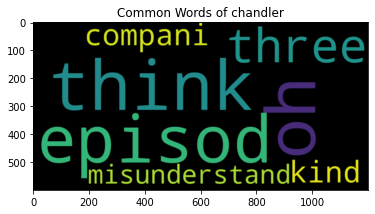

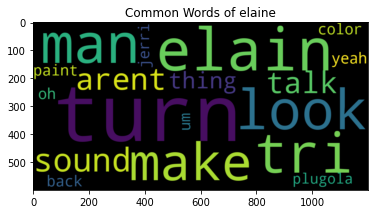

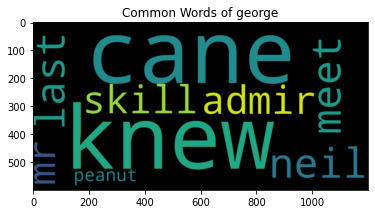

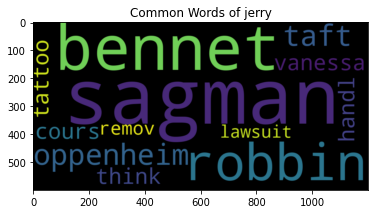

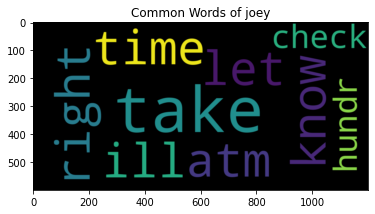

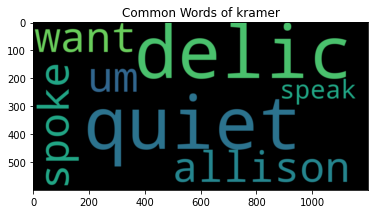

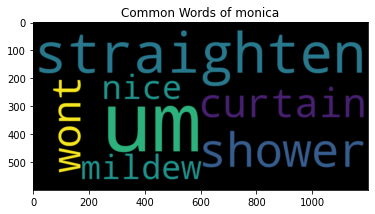

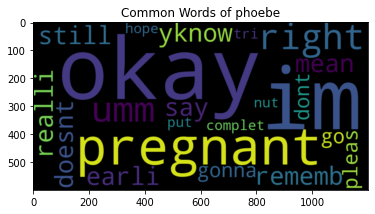

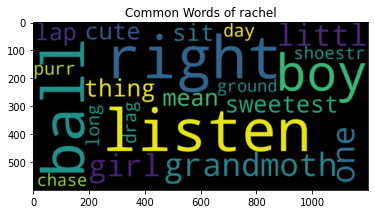

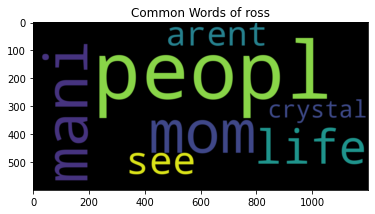

In [ ]:
from wordcloud import WordCloud
for i in range(0,10):
  plt.figure(figsize=(6,6))
  plt.title('Common Words of '+ characters_name_arr[i])
  words = test.iat[(x_test_by_char[i].index[1]),0]
  WC = WordCloud(width=1200, height=600, max_words=500, min_font_size=5)
  words = WC.generate(words)
  plt.imshow(words ,interpolation='bilinear')
  plt.show()


In [ ]:
results = {
           'Test score (Accuracy)': ['0.8285'],
           'Train score (Accuracy)': ['0.7284'],
           'Number of trainable parameters': ['617,441'],
           'Number of layers': [''],
           'Regularization methods': ['dropout'],
           'Number of epochs': ['5'],
           'Loss function': ['binary_crossentropy'],
           'Optimizer': ['Adam'],
           'Embedding dimension ':['LSTM']
           }

df = pd.DataFrame(results)
df

,Test score (Accuracy),Train score (Accuracy),Number of trainable parameters,Number of layers,Regularization methods,Number of epochs,Loss function,Optimizer,Embedding dimension
0,0.8285,0.7284,"617,441",,dropout,5,binary_crossentropy,Adam,LSTM


In [ ]:

import os
df.to_csv(os.path.join(os.getcwd(), 'exercise3.csv'))